Problem 1 - Static Map

For problem 1, I will create a static map of the travel times by car to the Forum shopping center. First of all, I will analyse the data to add georeference and obtain a classification of the travel times.

Data:
1- Travel time data: TravelTimes_to_5975373_Forum.txt.txt (Travel times and distances in the Helsinki Region to Forum shopping centers as text files)
2- Reference grid: MetropAccess_YKR_grid_EurefFIN.shp.

In [1]:
# Import modules needed
import numpy as np
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt

# Read text file into a variable called grid
grid = gpd.read_file('data/MetropAccess_YKR_grid_EurefFIN.shp')

# Check the data
grid

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."
...,...,...,...,...
13226,372875.0,6665630.0,6016698,"POLYGON ((373000.000 6665500.000, 372750.000 6..."
13227,373125.0,6665630.0,6016699,"POLYGON ((373250.000 6665500.000, 373000.000 6..."
13228,372375.0,6665380.0,6018252,"POLYGON ((372500.000 6665250.000, 372250.000 6..."
13229,372625.0,6665380.0,6018253,"POLYGON ((372750.000 6665250.000, 372500.000 6..."


In [2]:
# Read the travel time data file for Forum
data = pd.read_csv('data/TravelTimes_to_5975373_Forum.txt', sep=';') 

# Select only needed columns
data = data[['car_r_t', 'from_id', 'to_id']]

# Check the data
data

,car_r_t,from_id,to_id
0,49,5785640,5975373
1,49,5785641,5975373
2,57,5785642,5975373
3,60,5785643,5975373
4,48,5787544,5975373
...,...,...,...
13226,48,6016698,5975373
13227,50,6016699,5975373
13228,-1,6018252,-1
13229,49,6018253,5975373


To continue, I first need to georeference. I do so merging the travel-time data to the reference grid.

In [3]:
# Join attributes from data to grid
data_geo = grid.merge(data, on=[grid['YKR_ID'], data['from_id']], how="left")

It is important to "clean" the dataset and remove all no data values.

In [4]:
# Remove no data values
data_geo[data_geo==-1]=np.nan
data_geo.dropna(inplace=True)

Now, I classify the travel times into five-minute intervals
1- Create a UserDefined classifier using the pysal/mapclassify library using these class breaks: 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60;
2 - Apply the classifier to car_r_t columns and store the results car_r_t_cl column.

In [5]:
import mapclassify

# Create a UserDefines Classifier
bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
classifier = mapclassify.UserDefined.make(bins)

# Classify the data
data_geo['car_r_t_cl'] = data_geo[['car_r_t']].apply(classifier)

# Check the data
data_geo

,key_0,key_1,x,y,YKR_ID,geometry,car_r_t,from_id,to_id,car_r_t_cl
0,5785640,5785640,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",49.0,5785640,5975373.0,9
1,5785641,5785641,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",49.0,5785641,5975373.0,9
2,5785642,5785642,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",57.0,5785642,5975373.0,11
3,5785643,5785643,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",60.0,5785643,5975373.0,11
4,5787544,5787544,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",48.0,5787544,5975373.0,9
...,...,...,...,...,...,...,...,...,...,...
13225,6016697,6016697,372625.0,6665630.0,6016697,"POLYGON ((372750.000 6665500.000, 372500.000 6...",46.0,6016697,5975373.0,9
13226,6016698,6016698,372875.0,6665630.0,6016698,"POLYGON ((373000.000 6665500.000, 372750.000 6...",48.0,6016698,5975373.0,9
13227,6016699,6016699,373125.0,6665630.0,6016699,"POLYGON ((373250.000 6665500.000, 373000.000 6...",50.0,6016699,5975373.0,9
13229,6018253,6018253,372625.0,6665380.0,6018253,"POLYGON ((372750.000 6665250.000, 372500.000 6...",49.0,6018253,5975373.0,9


To add a new layer to the map, I read the dataset that holds the shopping centers' locations and I select only the one I need (Forum).

In [6]:
# Determine the file path and read the file
fp = 'data/shopping_centers.txt'
data_forum = pd.read_csv(fp, sep=';') 

# Import the module
from geopandas.tools import geocode

# Select the specific row
data_forum = data_forum.iloc[1]

# Geocode the address using Nominatim
geo = geocode(data_forum['addr'], provider='nominatim', user_agent='autogis_CM', timeout=10)

# Check the data
geo

,geometry,address
0,POINT (24.93858 60.16893),"Apollo Street Bar, 20, Mannerheimintie, Keskus..."


I now want to add a third layer holding the roads network.

In [7]:
# Determine the fie path and read the file
roads_fp = "data/roads.shp"
roads = gpd.read_file(roads_fp)

It is important that all layers have the same CRS system, so I check each layer and then reproject all of them to the same CRS

In [8]:
# Check the crs of each layer
print(roads.crs)
print(grid.crs)
print(geo.crs)

epsg:2392
epsg:3067
EPSG:4326


In [9]:
# Reproject geometries to ETRS89 / TM35FIN based on the grid crs:
roads = roads.to_crs(crs=grid.crs)
geo = geo.to_crs(crs=grid.crs)

I can finally plot the data I classified and all other layers:

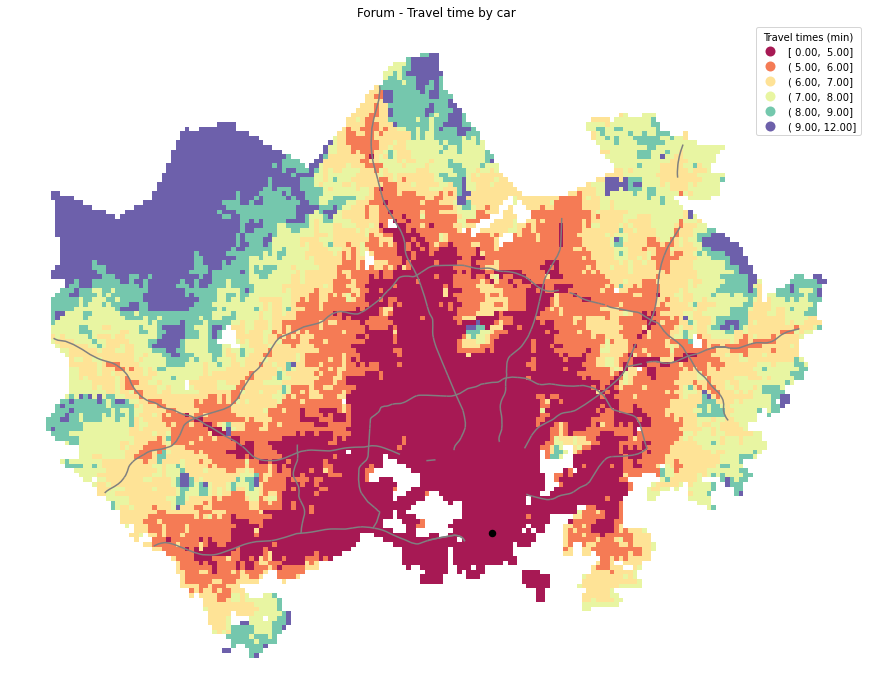

In [14]:
# Control figure size 
fig, ax = plt.subplots(figsize=(16,10))

# Visualize the travel times 
data_geo.plot(ax=ax, column='car_r_t_cl', linewidth=0.03, cmap="Spectral", scheme='quantiles', k=6, alpha=0.9, legend=True)

# Set a title for the map
plt.title("Forum - Travel time by car")

# Set a title for the legend
ax.get_legend().set_title("Travel times (min)")

# Add roads and shopping center's location on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color="grey", linewidth=1.5)
geo.plot(ax=ax, color="black", linewidth=1.5)

# Remove the empty white-space around the axes
plt.tight_layout()

# Remove the axis labels
plt.axis('off')

# Save the figure in png
outfp = "docs/forum_accessibility.png"
plt.savefig(outfp, dpi=300)

[Link to test map](https://autogis-2020.github.io/exercise-5-mulaclel/forum_accessibility.png)